In [1]:
from sympy import Matrix, init_printing, symbols, solve, simplify, zeros as O, eye as I
import numpy as np
import IPython
from PIL import Image
from matplotlib.pyplot import imshow, show
init_printing()
from icecream import ic

In [15]:
# 3 а
M = Matrix(4, 5, range(1, 21))

min_minor = float('inf')
for row1 in range(3):
    for row2 in range(row1+1, 4):
        for col1 in range(4): 
            for col2 in range(col1+1, 5):
                minor = M[row1, col1] * M[row2, col2] - M[row2, col1] * M[row1, col2]
                min_minor = min(min_minor, minor)
min_minor


In [11]:
# 3 а
M = Matrix(4, 5, range(1, 21))

min_minor = float('inf')
for row1 in range(2):
    for row2 in range(row1+1, 3):
        for row3 in range(row2+1, 4):
            for col1 in range(3):
                for col2 in range(col1+1, 4):
                    for col3 in range(col2+1, 5):
                        minor = Matrix(3,3,np.array(M, dtype=int)[[row1, row1, row1, row2,
                                   row2, row2, row3, row3, row3],
                                    [col1, col2, col3, col1,
                                    col2, col3, col1, col2, col3]]).det()
                        min_minor = min(min_minor, minor)
min_minor

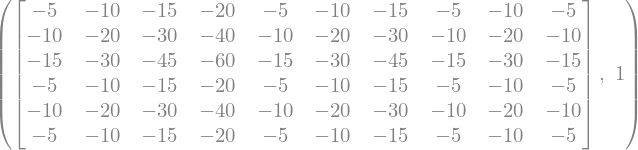

In [36]:
# 3 б
M = Matrix(4, 5, range(1, 21))

minor_matrix = np.zeros((6, 10), dtype=int)
count_row = -1
count_col = -1
for row1 in range(3):
    for row2 in range(row1+1, 4):
        count_row += 1
        for col1 in range(4):
            for col2 in range(col1+1, 5):
                count_col += 1
                cc = count_col % 10
                # ic(count_row, cc)
                minor = M[row1, col1] * M[row2, col2] - \
                    M[row2, col1] * M[row1, col2]
                minor_matrix[count_row, cc] = minor
N = Matrix(minor_matrix)
N, N.rank()
# ic(count_col)


### 4

==**a**==
$det(adj(A))$

$adj(A) \cdot \frac{1}{det(A)} = A^{-1}$

$adj(A)=A^{-1}\cdot det(A)$

$det(adj(A)) = det(A^{-1}\cdot det(A)) = det^{n}(A) \cdot det(A^{-1})$

$det(A^{-1})= \frac{1}{det(A)}$

$det^{n}(A) \cdot det(A^{-1}) = det^{n}(A) \cdot\frac{1}{det(A)} = det^{n-1}(A)$

---
==**b**==

Если А обратима, то
$A^{-1}=A^{\vee} \frac{1}{det(A)}$

$det(A) * A^{-1} = A^{\vee}$

$(A^{\vee})^{-1} = (det(A) \cdot A^{-1})^{-1}=A \cdot \frac{1}{det(A)}$

---
Предположим
$(A^{-1})^{\vee}=(A^{\vee})^{-1}$

$A \cdot \frac{1}{det(A)}=(A^{-1})^{\vee}$

$A \cdot \frac{1}{det(A)}=det(A^{-1}) \cdot A$

$\frac{1}{det(A)}=det(A^{-1})$

$det^{-1}(A)=det(A^{-1})$

верно, значит верно и предположение


---
==**c**==
Если А обратима, то

$$
\begin{align}
&A^{\vee \vee}=\\
&(A^{-1}det(A))^{-1} \cdot det(A^{-1}det(A))=\\
&det^{-1}(A) \cdot A \cdot det^{n}(A) \cdot det(A^{-1})=\\
&A \cdot det^{n-2}(A)
\end{align}
$$


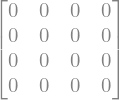

In [54]:
M = Matrix([
    [1, 2, 3, 4],
    [2, 4, 6, 8],
    [3, 6, 9, 12],
    [4, 8, 12, 16]
])
M.adjugate()


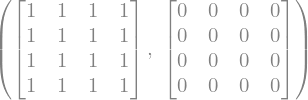

In [51]:

M = Matrix(np.full((4, 4), 1))
M, M.adjugate()

In [14]:
# 6

A = np.array([[1, 2, 3],
              [1, 4, 9], 
              [1, 8, 27]])

b = [4, 16, 46]

def CramerRule(A, b):
    answer = []
    A = np.array(A)
    det = np.linalg.det(A)
    for i in range(A.shape[1]):
        K = A.copy()
        K[:, i] = b
        answer.append(np.linalg.det(K) / det)
    return answer

CramerRule(A, b)
# A ** -1 * b


In [ ]:
# 7

# a) Инверсий 8, четная
# b) Инверсий (n-1) * n / 2
# n % 4 == 0 или 1 - четная
# n % 4 == 2 или 3 - нечетная

### 8
$a_{47}a_{63}a_{1i}a_{55}a_{7k}a_{24}a_{31}$

In [ ]:
# 8
i = k = 0

[4, 6, 1, 5, 7, 2, 3]
[7, 3, i, 5, k, 4, 1]

[1, 2, 3, 4, 5, 6, 7]
[i, 4, 1, 7, 5, 3, k]

[1, 2, 3, 4, 5, 6, 7]
[6, 4, 1, 7, 5, 3, 2]
# так как перестановка

In [16]:
# 9
[1, 2, 3, 4]
[0, 0, 2, 0]

[1, 2, 3, 4]
[1, 3, 2, 4]  # 1

[1, 2, 3, 4]
[1, 4, 2, 3]  # 2 +

[1, 2, 3, 4]
[3, 1, 2, 4]  # 2 +

[1, 2, 3, 4]
[3, 4, 2, 1]  # 5

[1, 2, 3, 4]
[4, 1, 2, 3]  # 3

[1, 2, 3, 4]
[4, 3, 2, 1]  # 6 +

# 1) a13 a21 a32 a44
# 2) a14 a23 a32 a41
# 3) a11 a24 a32 a43

In [ ]:
# 10

# n % 4 == 0 или 1 => +
# n % 4 == 2 или 3 => -
# sign((-1) ** (n % 4 > 1))

In [ ]:
# 11 a

[[1, 2, 3, 4, 5, 6, 7, 8, 9],  # 20
 [5, 9, 1, 8, 2, 6, 4, 7, 3]]  # 4 + 7 + 5 + 2 + 1 + 1 = 20


In [33]:
# 11 b

from itertools import permutations

def invers(a):
    res = 0
    for i in range(len(a)-1):
        for j in range(i+1, len(a)):
            res += a[i] > a[j]
    return res


def index(a):
    res = 0
    for n, i in enumerate(a[:-1]):
        res += (i > a[n+1]) * (n+1)
    return res


inverses = {}
indexes = {}

for i in permutations([1, 2, 3, 4]):
    inv = invers(i)
    print(inv, ind)
    inverses[inv] = inverses.get(inv, 0) + 1
    indexes[ind] = indexes.get(ind, 0) + 1
    
print(list(sorted(inverses.items())))
print(list(sorted(indexes.items())))

[(0, 1), (1, 3), (2, 5), (3, 6), (4, 5), (5, 3), (6, 1)]
[(0, 1), (1, 3), (2, 5), (3, 6), (4, 5), (5, 3), (6, 1)]


In [34]:
# 12

res_ind_10_inv_4 = 0
res_ind_4_inv_10 = 0

for i in permutations(range(1, 10)):
    res_ind_10_inv_4 += index(i) == 10 and invers(i) == 4
    res_ind_4_inv_10 += index(i) == 4 and invers(i) == 10
        
print(res_ind_10_inv_4)
print(res_ind_4_inv_10)


28
28
